In [11]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
import os
from anode.conv_models import ConvODENet
from anode.discrete_models import ResNet
from anode.training import Trainer
from experiments.dataloaders import mnist, cifar10, tiny_imagenet
from viz.plots import histories_plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_loader, test_loader = cifar10(256)


Files already downloaded and verified


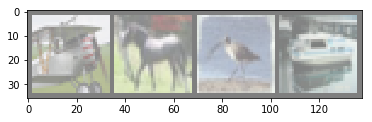

plane horse bird ship


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

# functions to show an image
img_size = (3, 32, 32)
output_dim = 10

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4, :,:]))
# print labels
print(' '.join ('%s' % classes[labels[j]] for j in range(4)) )

In [27]:
model = ConvODENet(device, img_size, num_filters=64, output_dim=10,
                                   augment_dim=5,
                                   time_dependent=True,
                                   non_linearity="relu",
                                   adjoint=True)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.0)

trainer = Trainer(model, optimizer, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, num_epochs=5)


Iteration 0/196
Loss: 2.342
NFE: 20
BNFE: 15
Total NFE: 35

Iteration 10/196
Loss: 2.135
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 20/196
Loss: 1.987
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 30/196
Loss: 1.912
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 40/196
Loss: 1.789
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 50/196
Loss: 1.882
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 60/196
Loss: 1.831
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 70/196
Loss: 1.823
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 80/196
Loss: 1.874
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 90/196
Loss: 1.867
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 100/196
Loss: 1.821
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 110/196
Loss: 1.903
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 120/196
Loss: 1.816
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 130/196
Loss: 1.762
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 140/196
Loss: 1.746
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 150/196
Loss: 1.809
NFE: 20
BNFE: 21
Total NFE: 41

Iteration 160/196


In [32]:

torch.save(model, './model/aa')


In [33]:
model = torch.load('./model/aa')
model.eval()


ConvODENet(
  (odeblock): ODEBlock(
    (odefunc): ConvODEFunc(
      (conv1): Conv2dTime(9, 64, kernel_size=(1, 1), stride=(1, 1))
      (conv2): Conv2dTime(65, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2dTime(65, 8, kernel_size=(1, 1), stride=(1, 1))
      (non_linearity): ReLU(inplace)
    )
  )
  (linear_layer): Linear(in_features=8192, out_features=10, bias=True)
)

In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


In [37]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 81 %
Accuracy of   car : 70 %
Accuracy of  bird : 53 %
Accuracy of   cat : 18 %
Accuracy of  deer : 29 %
Accuracy of   dog : 34 %
Accuracy of  frog : 80 %
Accuracy of horse : 75 %
Accuracy of  ship : 61 %
Accuracy of truck : 69 %
